<a href="https://colab.research.google.com/github/Sunilkumar414674/CODSOFTtask4/blob/main/codsofttask4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 # Load the sales dataset
import pandas as pd
sales_data= pd.read_csv('/content/codsofttask4.csv')

# Display the first few rows of the dataset
print(sales_data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
# sales data statistics
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# checking the missing values in sales data
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Figure size 1200x800 with 0 Axes>

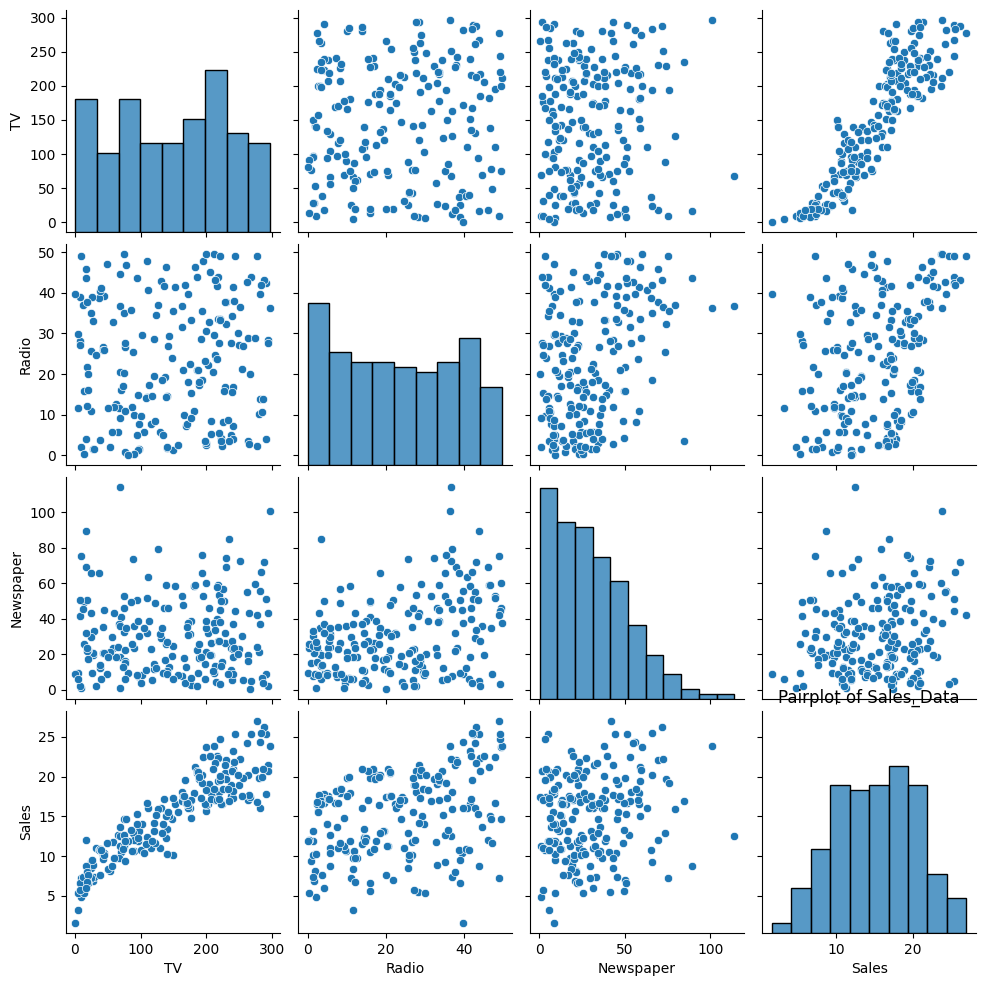

In [ ]:
# Data Visualization
# to Visualize the data and to check if there are any patterns that can help in classification we will use pair plot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(sales_data)
plt.title('Pairplot of Sales_Data')
plt.show()


1. TV : The distribution of TV advertising costs is roughly uniform, with some peaks at specific spending levels.

2. Radio : The distribution of radio advertising costs is relatively uniform, with no clear peaks.

3. Newspaper : The distribution of newspaper advertising costs shows a decline as the costs increase.

4. Sales : The distribution of sales shows a relatively normal distribution, with most values clustered around the center.

5. TV Advertising: There is a strong positive correlation between TV advertising and sales. This suggests that increasing TV advertising spend is likely to result in higher sales.

6. Radio and Newspaper Advertising : There is no clear correlation between these advertising spends and sales. This might indicate that these advertising channels are not as effective in driving sales as TV advertising, or the relationship is more complex and not linear.

In [ ]:
# Data Preprocessing
# for Data Preprocessing we will splitting the sales data set into training and test sets, and standardizing the feature values.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the  sales_data into features (data_X ) and target (data_Y)
data_X = sales_data[['TV', 'Radio','Newspaper']]
data_Y = sales_data['Sales']

data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X,data_Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initializing and train the model
model = LinearRegression()
model.fit(data_X_train, data_y_train)

# Predict on the test set
y_pred = model.predict(data_X_test)

In [ ]:
# the evaluation metrics for your sales prediction model
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(data_y_test, y_pred))
print("R^2 Score:", r2_score(data_y_test, y_pred))

Mean Squared Error: 2.541624036229147
R^2 Score: 0.9091484341849799


**MSE:**  The model has a relatively low mean squared error, indicating that the predictions are close to the actual sales values.

**R^2 Score:**   The high R^2 score of 0.91 indicates that the model explains most of the variability in the sales data, suggesting a strong predictive power.

In [ ]:
# Improve the sales prediction model
#Cross-Validation : we Use cross-validation to assess the model performance.
from sklearn.model_selection import cross_val_score

# sales prediction model Perform 10-fold cross-validation
performance= cross_val_score(model,data_X,data_Y, cv=10)
print("Cross-validation scores:",performance )
print("Mean cross-validation score:", performance.mean())


Cross-validation scores: [0.89391193 0.84835255 0.91336339 0.93740449 0.90972209 0.92995146
 0.85494586 0.83727721 0.86267846 0.927566  ]
Mean cross-validation score: 0.8915173447734139


**1.Individual Cross-Validation Scores:**

**Scores:**  
[0.89391193, 0.84835255, 0.91336339, 0.93740449, 0.90972209, 0.92995146, 0.85494586, 0.83727721, 0.86267846, 0.927566].

These scores represent the R^2 values for each fold in the cross-validation process.Higher R^2 scores indicate better performance.


An R^2 score of 0.89 means that 89% of the variance in sales can be explained by the sales prediction model.

**2.Mean Cross-Validation Score:**

Value: 0.8915173447734139

The mean cross-validation score is the average R^2 score across all the folds. An average score of 0.89 indicates that, on average, the model explains about 89% of the variance in the sales data across different subsets of the data. This suggests that the model has strong predictive power.

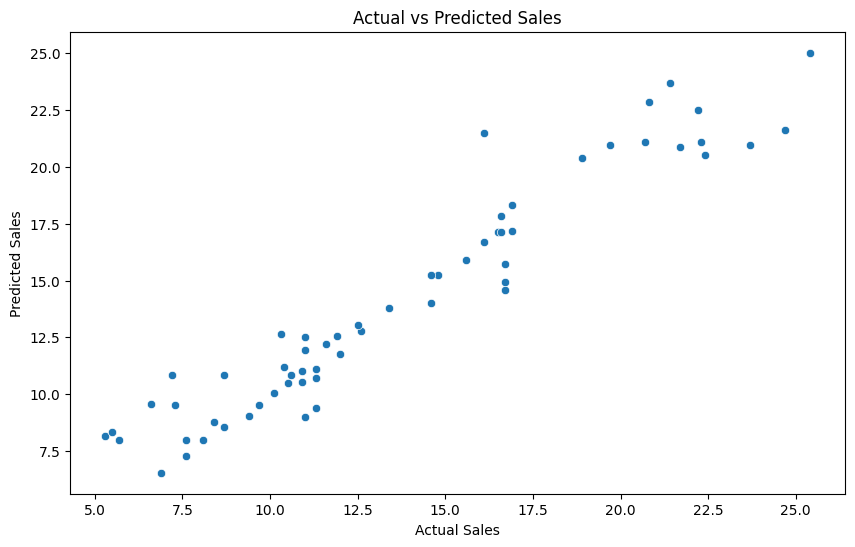

In [ ]:
# Scatter plot of actual vs predicted sales

plt.figure(figsize=(10,6))
sns.scatterplot(x=data_y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


**1.General Trend:**
The points in the scatter plot indicating a positive correlation between actual sales and predicted sales. This suggests that the model's predictions generally align with the actual sales values.

**2.Accuracy and Spread:** The closer the points are to the diagonal line, the more accurate the model's predictions are.

**3.Outliers:** There are a few points that deviate significantly from the diagonal line, which may indicate outliers where the model's predictions were less accurate.

**4.Consistency:** The consistency of the spread along the entire range of sales values suggests that the model performs reasonably well across different sales levels.


In [ ]:
# to Save the Model for sales preiction for forecasting future purpose
#Use joblib or pickle to save the model for future use.
import joblib
joblib.dump(model,'sales_predict')


#  to Load the Model:
# Load the saved model to make predictions on new data.
a= joblib.load('sales_predict')
a


LinearRegression()